In [1]:
from sklearn import datasets,metrics
import matplotlib.pyplot as plt
from sklearn.cluster import AffinityPropagation
import numpy as np
from sklearn.metrics import silhouette_score, pairwise_distances
import pandas as pd

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

In [2]:
# Load dataset

queen_dataset_full = pd.read_csv("Queen - FeatureValues (Pruned).csv")

In [3]:
# Visualize full Queen dataset

queen_dataset_full.head()

,Unnamed: 0,Number_of_Pitches,Number_of_Pitch_Classes,Number_of_Common_Pitches,Number_of_Common_Pitch_Classes,Range,Importance_of_Bass_Register,Importance_of_Middle_Register,Importance_of_High_Register,Dominant_Spread,...,Parallel_Motion,Similar_Motion,Contrary_Motion,Oblique_Motion,Parallel_Fifths,Parallel_Octaves,Dynamic_Range,Variation_of_Dynamics,Variation_of_Dynamics_In_Each_Voice,Average_Note_to_Note_Change_in_Dynamics
0,C:\Users\Earl Felizardo\Documents\Thesis Files...,44.0,12.0,1.0,1.0,55.0,0.50510,0.3768,0.1181,5.0,...,0.02799,0.2656,0.01266,0.6938,0.005952,0.008739,104.0,23.14,10.800,18.780
1,C:\Users\Earl Felizardo\Documents\Thesis Files...,72.0,12.0,0.0,0.0,74.0,0.36430,0.4403,0.1954,7.0,...,0.08032,0.2305,0.06892,0.6202,0.003327,0.024240,97.0,18.18,3.787,4.004
2,C:\Users\Earl Felizardo\Documents\Thesis Files...,63.0,12.0,2.0,1.0,75.0,0.37830,0.4297,0.1920,5.0,...,0.06540,0.2662,0.04382,0.6246,0.000654,0.031390,106.0,16.69,9.189,12.230
3,C:\Users\Earl Felizardo\Documents\Thesis Files...,64.0,12.0,0.0,0.0,69.0,0.32580,0.5510,0.1232,2.0,...,0.08929,0.2640,0.09276,0.5540,0.005635,0.038580,89.0,16.17,6.202,2.933
4,C:\Users\Earl Felizardo\Documents\Thesis Files...,70.0,12.0,3.0,0.0,108.0,0.08416,0.2683,0.6475,7.0,...,0.09331,0.1897,0.04899,0.6680,0.005443,0.023330,85.0,15.02,4.429,1.990


In [4]:
# Remove label column

queen_dataset_full_nolabel = queen_dataset_full.iloc[:, 1:]
dataset = queen_dataset_full_nolabel

In [5]:
# NORMALIZING THE DATASET

In [6]:
# Robust Scaling

robust_scaler = RobustScaler()
dataset_normalized = robust_scaler.fit_transform(dataset)
d1 = pd.DataFrame(dataset_normalized, columns=dataset.columns)

In [7]:
# FEATURE SELECTION

In [8]:
# Full Features (FS1)

fs1 = pd.DataFrame(dataset_normalized, columns=dataset.columns)

fs1_col1 = "Number_of_Pitches"
fs1_col2 = "Number_of_Pitch_Classes"
fs1_col3 = "Number_of_Common_Pitches"
fs1_col4 = "Number_of_Common_Pitch_Classes"
fs1_col5 = "Range"
fs1_col6 = "Importance_of_Bass_Register"
fs1_col7 = "Importance_of_Middle_Register"
fs1_col8 = "Importance_of_High_Register"
fs1_col9 = "Dominant_Spread"
fs1_col10 = "Strong_Tonal_Centres"
fs1_col11 = "Mean_Pitch"
fs1_col12 = "Mean_Pitch_Class"
fs1_col13 = "Most_Common_Pitch"
fs1_col14 = "Most_Common_Pitch_Class"
fs1_col15 = "Prevalence_of_Most_Common_Pitch"
fs1_col16 = "Prevalence_of_Most_Common_Pitch_Class"
fs1_col17 = "Relative_Prevalence_of_Top_Pitches"
fs1_col18 = "Relative_Prevalence_of_Top_Pitch_Classes"
fs1_col19 = "Interval_Between_Most_Prevalent_Pitches"
fs1_col20 = "Interval_Between_Most_Prevalent_Pitch_Classes"
fs1_col21 = "Pitch_Variability"
fs1_col22 = "Pitch_Class_Variability"
fs1_col23 = "Pitch_Class_Variability_After_Folding"
fs1_col24 = "Pitch_Skewness"
fs1_col25 = "Pitch_Class_Skewness"
fs1_col26 = "Pitch_Class_Skewness_After_Folding"
fs1_col27 = "Pitch_Kurtosis"
fs1_col28 = "Pitch_Class_Kurtosis"
fs1_col29 = "Pitch_Class_Kurtosis_After_Folding"
fs1_col30 = "Major_or_Minor"
fs1_col31 = "First_Pitch"
fs1_col32 = "First_Pitch_Class"
fs1_col33 = "Last_Pitch"
fs1_col34 = "Last_Pitch_Class"
fs1_col35 = "Glissando_Prevalence"
fs1_col36 = "Average_Range_of_Glissandos"
fs1_col37 = "Vibrato_Prevalence"
fs1_col38 = "Microtone_Prevalence"
fs1_col39 = "Most_Common_Melodic_Interval"
fs1_col40 = "Mean_Melodic_Interval"
fs1_col41 = "Number_of_Common_Melodic_Intervals"
fs1_col42 = "Distance_Between_Most_Prevalent_Melodic_Intervals"
fs1_col43 = "Prevalence_of_Most_Common_Melodic_Interval"
fs1_col44 = "Relative_Prevalence_of_Most_Common_Melodic_Intervals"
fs1_col45 = "Amount_of_Arpeggiation"
fs1_col46 = "Repeated_Notes"
fs1_col47 = "Chromatic_Motion"
fs1_col48 = "Stepwise_Motion"
fs1_col49 = "Melodic_Thirds"
fs1_col50 = "Melodic_Perfect_Fourths"
fs1_col51 = "Melodic_Tritones"
fs1_col52 = "Melodic_Perfect_Fifths"
fs1_col53 = "Melodic_Sixths"
fs1_col54 = "Melodic_Sevenths"
fs1_col55 = "Melodic_Octaves"
fs1_col56 = "Melodic_Large_Intervals"
fs1_col57 = "Minor_Major_Melodic_Third_Ratio"
fs1_col58 = "Melodic_Embellishments"
fs1_col59 = "Direction_of_Melodic_Motion"
fs1_col60 = "Average_Length_of_Melodic_Arcs"
fs1_col61 = "Average_Interval_Spanned_by_Melodic_Arcs"
fs1_col62 = "Melodic_Pitch_Variety"
fs1_col63 = "Average_Number_of_Simultaneous_Pitch_Classes"
fs1_col64 = "Variability_of_Number_of_Simultaneous_Pitch_Classes"
fs1_col65 = "Average_Number_of_Simultaneous_Pitches"
fs1_col66 = "Variability_of_Number_of_Simultaneous_Pitches"
fs1_col67 = "Most_Common_Vertical_Interval"
fs1_col68 = "Second_Most_Common_Vertical_Interval"
fs1_col69 = "Distance_Between_Two_Most_Common_Vertical_Intervals"
fs1_col70 = "Prevalence_of_Most_Common_Vertical_Interval"
fs1_col71 = "Prevalence_of_Second_Most_Common_Vertical_Interval"
fs1_col72 = "Prevalence_Ratio_of_Two_Most_Common_Vertical_Intervals"
fs1_col73 = "Vertical_Unisons"
fs1_col74 = "Vertical_Minor_Seconds"
fs1_col75 = "Vertical_Thirds"
fs1_col76 = "Vertical_Tritones"
fs1_col77 = "Vertical_Perfect_Fourths"
fs1_col78 = "Vertical_Perfect_Fifths"
fs1_col79 = "Vertical_Sixths"
fs1_col80 = "Vertical_Sevenths"
fs1_col81 = "Vertical_Octaves"
fs1_col82 = "Perfect_Vertical_Intervals"
fs1_col83 = "Vertical_Dissonance_Ratio"
fs1_col84 = "Vertical_Minor_Third_Prevalence"
fs1_col85 = "Vertical_Major_Third_Prevalence"
fs1_col86 = "Chord_Duration"
fs1_col87 = "Partial_Chords"
fs1_col88 = "Standard_Triads"
fs1_col89 = "Diminished_and_Augmented_Triads"
fs1_col90 = "Dominant_Seventh_Chords"
fs1_col91 = "Seventh_Chords"
fs1_col92 = "Non-Standard_Chords"
fs1_col93 = "Complex_Chords"
fs1_col94 = "Minor_Major_Triad_Ratio"
fs1_col95 = "Simple_Initial_Meter"
fs1_col96 = "Compound_Initial_Meter"
fs1_col97 = "Complex_Initial_Meter"
fs1_col98 = "Duple_Initial_Meter"
fs1_col99 = "Triple_Initial_Meter"
fs1_col100 = "Quadruple_Initial_Meter"
fs1_col101 = "Metrical_Diversity"
fs1_col102 = "Total_Number_of_Notes"
fs1_col103 = "Note_Density_per_Quarter_Note"
fs1_col104 = "Note_Density_per_Quarter_Note_per_Voice"
fs1_col105 = "Range_of_Rhythmic_Values"
fs1_col106 = "Number_of_Different_Rhythmic_Values_Present"
fs1_col107 = "Number_of_Common_Rhythmic_Values_Present"
fs1_col108 = "Prevalence_of_Very_Short_Rhythmic_Values"
fs1_col109 = "Prevalence_of_Short_Rhythmic_Values"
fs1_col110 = "Prevalence_of_Medium_Rhythmic_Values"
fs1_col111 = "Prevalence_of_Long_Rhythmic_Values"
fs1_col112 = "Prevalence_of_Very_Long_Rhythmic_Values"
fs1_col113 = "Prevalence_of_Dotted_Notes"
fs1_col114 = "Shortest_Rhythmic_Value"
fs1_col115 = "Longest_Rhythmic_Value"
fs1_col116 = "Mean_Rhythmic_Value"
fs1_col117 = "Most_Common_Rhythmic_Value"
fs1_col118 = "Prevalence_of_Most_Common_Rhythmic_Value"
fs1_col119 = "Relative_Prevalence_of_Most_Common_Rhythmic_Values"
fs1_col120 = "Difference_Between_Most_Common_Rhythmic_Values"
fs1_col121 = "Rhythmic_Value_Variability"
fs1_col122 = "Rhythmic_Value_Skewness"
fs1_col123 = "Rhythmic_Value_Kurtosis"
fs1_col124 = "Mean_Rhythmic_Value_Run_Length"
fs1_col125 = "Median_Rhythmic_Value_Run_Length"
fs1_col126 = "Variability_in_Rhythmic_Value_Run_Lengths"
fs1_col127 = "Mean_Rhythmic_Value_Offset"
fs1_col128 = "Median_Rhythmic_Value_Offset"
fs1_col129 = "Variability_of_Rhythmic_Value_Offsets"
fs1_col130 = "Complete_Rests_Fraction"
fs1_col131 = "Partial_Rests_Fraction"
fs1_col132 = "Average_Rest_Fraction_Across_Voices"
fs1_col133 = "Longest_Complete_Rest"
fs1_col134 = "Longest_Partial_Rest"
fs1_col135 = "Mean_Complete_Rest_Duration"
fs1_col136 = "Mean_Partial_Rest_Duration"
fs1_col137 = "Median_Complete_Rest_Duration"
fs1_col138 = "Median_Partial_Rest_Duration"
fs1_col139 = "Variability_of_Complete_Rest_Durations"
fs1_col140 = "Variability_of_Partial_Rest_Durations"
fs1_col141 = "Variability_Across_Voices_of_Combined_Rests"
fs1_col142 = "Number_of_Strong_Rhythmic_Pulses_-_Tempo_Standardized"
fs1_col143 = "Number_of_Moderate_Rhythmic_Pulses_-_Tempo_Standardized"
fs1_col144 = "Number_of_Relatively_Strong_Rhythmic_Pulses_-_Tempo_Standardized"
fs1_col145 = "Strongest_Rhythmic_Pulse_-_Tempo_Standardized"
fs1_col146 = "Second_Strongest_Rhythmic_Pulse_-_Tempo_Standardized"
fs1_col147 = "Harmonicity_of_Two_Strongest_Rhythmic_Pulses_-_Tempo_Standardized"
fs1_col148 = "Strength_of_Strongest_Rhythmic_Pulse_-_Tempo_Standardized"
fs1_col149 = "Strength_of_Second_Strongest_Rhythmic_Pulse_-_Tempo_Standardized"
fs1_col150 = "Strength_Ratio_of_Two_Strongest_Rhythmic_Pulses_-_Tempo_Standardized"
fs1_col151 = "Combined_Strength_of_Two_Strongest_Rhythmic_Pulses_-_Tempo_Standardized"
fs1_col152 = "Rhythmic_Variability_-_Tempo_Standardized"
fs1_col153 = "Rhythmic_Looseness_-_Tempo_Standardized"
fs1_col154 = "Polyrhythms_-_Tempo_Standardized"
fs1_col155 = "Initial_Tempo"
fs1_col156 = "Mean_Tempo"
fs1_col157 = "Tempo_Variability"
fs1_col158 = "Duration_in_Seconds"
fs1_col159 = "Note_Density"
fs1_col160 = "Note_Density_Variability"
fs1_col161 = "Average_Time_Between_Attacks"
fs1_col162 = "Average_Time_Between_Attacks_for_Each_Voice"
fs1_col163 = "Variability_of_Time_Between_Attacks"
fs1_col164 = "Average_Variability_of_Time_Between_Attacks_for_Each_Voice"
fs1_col165 = "Minimum_Note_Duration"
fs1_col166 = "Maximum_Note_Duration"
fs1_col167 = "Average_Note_Duration"
fs1_col168 = "Variability_of_Note_Durations"
fs1_col169 = "Amount_of_Staccato"
fs1_col170 = "Number_of_Strong_Rhythmic_Pulses"
fs1_col171 = "Number_of_Moderate_Rhythmic_Pulses"
fs1_col172 = "Number_of_Relatively_Strong_Rhythmic_Pulses"
fs1_col173 = "Strongest_Rhythmic_Pulse"
fs1_col174 = "Second_Strongest_Rhythmic_Pulse"
fs1_col175 = "Harmonicity_of_Two_Strongest_Rhythmic_Pulses"
fs1_col176 = "Strength_of_Strongest_Rhythmic_Pulse"
fs1_col177 = "Strength_of_Second_Strongest_Rhythmic_Pulse"
fs1_col178 = "Strength_Ratio_of_Two_Strongest_Rhythmic_Pulses"
fs1_col179 = "Combined_Strength_of_Two_Strongest_Rhythmic_Pulses"
fs1_col180 = "Rhythmic_Variability"
fs1_col181 = "Rhythmic_Looseness"
fs1_col182 = "Polyrhythms"
fs1_col183 = "Variability_of_Note_Prevalence_of_Pitched_Instruments"
fs1_col184 = "Variability_of_Note_Prevalence_of_Unpitched_Instruments"
fs1_col185 = "Number_of_Pitched_Instruments"
fs1_col186 = "Number_of_Unpitched_Instruments"
fs1_col187 = "Unpitched_Percussion_Instrument_Prevalence"
fs1_col188 = "String_Keyboard_Prevalence"
fs1_col189 = "Acoustic_Guitar_Prevalence"
fs1_col190 = "Electric_Guitar_Prevalence"
fs1_col191 = "Violin_Prevalence"
fs1_col192 = "Saxophone_Prevalence"
fs1_col193 = "Brass_Prevalence"
fs1_col194 = "Woodwinds_Prevalence"
fs1_col195 = "Orchestral_Strings_Prevalence"
fs1_col196 = "String_Ensemble_Prevalence"
fs1_col197 = "Electric_Instrument_Prevalence"
fs1_col198 = "Maximum_Number_of_Independent_Voices"
fs1_col199 = "Average_Number_of_Independent_Voices"
fs1_col200 = "Variability_of_Number_of_Independent_Voices"
fs1_col201 = "Voice_Equality_-_Number_of_Notes"
fs1_col202 = "Voice_Equality_-_Note_Duration"
fs1_col203 = "Voice_Equality_-_Dynamics"
fs1_col204 = "Voice_Equality_-_Melodic_Leaps"
fs1_col205 = "Voice_Equality_-_Range"
fs1_col206 = "Importance_of_Loudest_Voice"
fs1_col207 = "Relative_Range_of_Loudest_Voice"
fs1_col208 = "Relative_Range_Isolation_of_Loudest_Voice"
fs1_col209 = "Relative_Range_of_Highest_Line"
fs1_col210 = "Relative_Note_Density_of_Highest_Line"
fs1_col211 = "Relative_Note_Durations_of_Lowest_Line"
fs1_col212 = "Relative_Size_of_Melodic_Intervals_in_Lowest_Line"
fs1_col213 = "Voice_Overlap"
fs1_col214 = "Voice_Separation"
fs1_col215 = "Variability_of_Voice_Separation"
fs1_col216 = "Parallel_Motion"
fs1_col217 = "Similar_Motion"
fs1_col218 = "Contrary_Motion"
fs1_col219 = "Oblique_Motion"
fs1_col220 = "Parallel_Fifths"
fs1_col221 = "Parallel_Octaves"
fs1_col222 = "Dynamic_Range"
fs1_col223 = "Variation_of_Dynamics"
fs1_col224 = "Variation_of_Dynamics_In_Each_Voice"
fs1_col225 = "Average_Note_to_Note_Change_in_Dynamics"

fs1 = fs1[[fs1_col1, fs1_col2, fs1_col3, fs1_col4, fs1_col5, fs1_col6, fs1_col7, fs1_col8, fs1_col9, fs1_col10, fs1_col11, fs1_col12, fs1_col13, fs1_col14, fs1_col15, fs1_col16, fs1_col17, fs1_col18, fs1_col19, fs1_col20, fs1_col21, fs1_col22, fs1_col23, fs1_col24, fs1_col25, fs1_col26, fs1_col27, fs1_col28, fs1_col29, fs1_col30, fs1_col31, fs1_col32, fs1_col33, fs1_col34, fs1_col35, fs1_col36, fs1_col37, fs1_col38, fs1_col39, fs1_col40, fs1_col41, fs1_col42, fs1_col43, fs1_col44, fs1_col45, fs1_col46, fs1_col47, fs1_col48, fs1_col49, fs1_col50, fs1_col51, fs1_col52, fs1_col53, fs1_col54, fs1_col55, fs1_col56, fs1_col57, fs1_col58, fs1_col59, fs1_col60, fs1_col61, fs1_col62, fs1_col63, fs1_col64, fs1_col65, fs1_col66, fs1_col67, fs1_col68, fs1_col69, fs1_col70, fs1_col71, fs1_col72, fs1_col73, fs1_col74, fs1_col75, fs1_col76, fs1_col77, fs1_col78, fs1_col79, fs1_col80, fs1_col81, fs1_col82, fs1_col83, fs1_col84, fs1_col85, fs1_col86, fs1_col87, fs1_col88, fs1_col89, fs1_col90, fs1_col91, fs1_col92, fs1_col93, fs1_col94, fs1_col95, fs1_col96, fs1_col97, fs1_col98, fs1_col99, fs1_col100, fs1_col101, fs1_col102, fs1_col103, fs1_col104, fs1_col105, fs1_col106, fs1_col107, fs1_col108, fs1_col109, fs1_col110, fs1_col111, fs1_col112, fs1_col113, fs1_col114, fs1_col115, fs1_col116, fs1_col117, fs1_col118, fs1_col119, fs1_col120, fs1_col121, fs1_col122, fs1_col123, fs1_col124, fs1_col125, fs1_col126, fs1_col127, fs1_col128, fs1_col129, fs1_col130, fs1_col131, fs1_col132, fs1_col133, fs1_col134, fs1_col135, fs1_col136, fs1_col137, fs1_col138, fs1_col139, fs1_col140, fs1_col141, fs1_col142, fs1_col143, fs1_col144, fs1_col145, fs1_col146, fs1_col147, fs1_col148, fs1_col149, fs1_col150, fs1_col151, fs1_col152, fs1_col153, fs1_col154, fs1_col155, fs1_col156, fs1_col157, fs1_col158, fs1_col159, fs1_col160, fs1_col161, fs1_col162, fs1_col163, fs1_col164, fs1_col165, fs1_col166, fs1_col167, fs1_col168, fs1_col169, fs1_col170, fs1_col171, fs1_col172, fs1_col173, fs1_col174, fs1_col175, fs1_col176, fs1_col177, fs1_col178, fs1_col179, fs1_col180, fs1_col181, fs1_col182, fs1_col183, fs1_col184, fs1_col185, fs1_col186, fs1_col187, fs1_col188, fs1_col189, fs1_col190, fs1_col191, fs1_col192, fs1_col193, fs1_col194, fs1_col195, fs1_col196, fs1_col197, fs1_col198, fs1_col199, fs1_col200, fs1_col201, fs1_col202, fs1_col203, fs1_col204, fs1_col205, fs1_col206, fs1_col207, fs1_col208, fs1_col209, fs1_col210, fs1_col211, fs1_col212, fs1_col213, fs1_col214, fs1_col215, fs1_col216, fs1_col217, fs1_col218, fs1_col219, fs1_col220, fs1_col221, fs1_col222, fs1_col223, fs1_col224, fs1_col225]]

In [9]:
# Reduced Features (FS2)

fs2 = pd.DataFrame(dataset_normalized, columns=dataset.columns)

fs2_col1 = "Number_of_Pitches"
fs2_col2 = "Number_of_Pitch_Classes"
fs2_col3 = "Number_of_Common_Pitches"
fs2_col4 = "Number_of_Common_Pitch_Classes"
fs2_col5 = "Range"
fs2_col6 = "Importance_of_Bass_Register"
fs2_col7 = "Importance_of_Middle_Register"
fs2_col8 = "Importance_of_High_Register"
fs2_col9 = "Dominant_Spread"
fs2_col10 = "Strong_Tonal_Centres"
fs2_col11 = "Relative_Prevalence_of_Top_Pitches"
fs2_col12 = "Relative_Prevalence_of_Top_Pitch_Classes"
fs2_col13 = "Interval_Between_Most_Prevalent_Pitches"
fs2_col14 = "Interval_Between_Most_Prevalent_Pitch_Classes"
fs2_col15 = "Pitch_Variability"
fs2_col16 = "Pitch_Class_Variability"
fs2_col17 = "Pitch_Class_Variability_After_Folding"
fs2_col18 = "Pitch_Skewness"
fs2_col19 = "Pitch_Class_Skewness"
fs2_col20 = "Pitch_Class_Skewness_After_Folding"
fs2_col21 = "Pitch_Kurtosis"
fs2_col22 = "Pitch_Class_Kurtosis"
fs2_col23 = "Pitch_Class_Kurtosis_After_Folding"
fs2_col24 = "Most_Common_Melodic_Interval"
fs2_col25 = "Mean_Melodic_Interval"
fs2_col26 = "Number_of_Common_Melodic_Intervals"
fs2_col27 = "Distance_Between_Most_Prevalent_Melodic_Intervals"
fs2_col28 = "Prevalence_of_Most_Common_Melodic_Interval"
fs2_col29 = "Relative_Prevalence_of_Most_Common_Melodic_Intervals"
fs2_col30 = "Amount_of_Arpeggiation"
fs2_col31 = "Repeated_Notes"
fs2_col32 = "Chromatic_Motion"
fs2_col33 = "Stepwise_Motion"
fs2_col34 = "Melodic_Thirds"
fs2_col35 = "Melodic_Perfect_Fourths"
fs2_col36 = "Melodic_Tritones"
fs2_col37 = "Melodic_Perfect_Fifths"
fs2_col38 = "Melodic_Sixths"
fs2_col39 = "Melodic_Sevenths"
fs2_col40 = "Melodic_Octaves"
fs2_col41 = "Melodic_Large_Intervals"
fs2_col42 = "Minor_Major_Melodic_Third_Ratio"
fs2_col43 = "Melodic_Embellishments"
fs2_col44 = "Direction_of_Melodic_Motion"
fs2_col45 = "Average_Length_of_Melodic_Arcs"
fs2_col46 = "Average_Interval_Spanned_by_Melodic_Arcs"
fs2_col47 = "Melodic_Pitch_Variety"
fs2_col48 = "Average_Number_of_Simultaneous_Pitch_Classes"
fs2_col49 = "Variability_of_Number_of_Simultaneous_Pitch_Classes"
fs2_col50 = "Average_Number_of_Simultaneous_Pitches"
fs2_col51 = "Variability_of_Number_of_Simultaneous_Pitches"
fs2_col52 = "Most_Common_Vertical_Interval"
fs2_col53 = "Second_Most_Common_Vertical_Interval"
fs2_col54 = "Distance_Between_Two_Most_Common_Vertical_Intervals"
fs2_col55 = "Prevalence_of_Most_Common_Vertical_Interval"
fs2_col56 = "Prevalence_of_Second_Most_Common_Vertical_Interval"
fs2_col57 = "Prevalence_Ratio_of_Two_Most_Common_Vertical_Intervals"
fs2_col58 = "Vertical_Unisons"
fs2_col59 = "Vertical_Minor_Seconds"
fs2_col60 = "Vertical_Thirds"
fs2_col61 = "Vertical_Tritones"
fs2_col62 = "Vertical_Perfect_Fourths"
fs2_col63 = "Vertical_Perfect_Fifths"
fs2_col64 = "Vertical_Sixths"
fs2_col65 = "Vertical_Sevenths"
fs2_col66 = "Vertical_Octaves"
fs2_col67 = "Perfect_Vertical_Intervals"
fs2_col68 = "Vertical_Dissonance_Ratio"
fs2_col69 = "Vertical_Minor_Third_Prevalence"
fs2_col70 = "Vertical_Major_Third_Prevalence"
fs2_col71 = "Chord_Duration"
fs2_col72 = "Partial_Chords"
fs2_col73 = "Standard_Triads"
fs2_col74 = "Diminished_and_Augmented_Triads"
fs2_col75 = "Dominant_Seventh_Chords"
fs2_col76 = "Seventh_Chords"
fs2_col77 = "Non-Standard_Chords"
fs2_col78 = "Complex_Chords"
fs2_col79 = "Minor_Major_Triad_Ratio"
fs2_col80 = "Simple_Initial_Meter"
fs2_col81 = "Compound_Initial_Meter"
fs2_col82 = "Complex_Initial_Meter"
fs2_col83 = "Duple_Initial_Meter"
fs2_col84 = "Triple_Initial_Meter"
fs2_col85 = "Quadruple_Initial_Meter"
fs2_col86 = "Metrical_Diversity"
fs2_col87 = "Total_Number_of_Notes"
fs2_col88 = "Note_Density_per_Quarter_Note"
fs2_col89 = "Note_Density_per_Quarter_Note_per_Voice"
fs2_col90 = "Range_of_Rhythmic_Values"
fs2_col91 = "Number_of_Different_Rhythmic_Values_Present"
fs2_col92 = "Number_of_Common_Rhythmic_Values_Present"
fs2_col93 = "Prevalence_of_Very_Short_Rhythmic_Values"
fs2_col94 = "Prevalence_of_Short_Rhythmic_Values"
fs2_col95 = "Prevalence_of_Medium_Rhythmic_Values"
fs2_col96 = "Prevalence_of_Long_Rhythmic_Values"
fs2_col97 = "Prevalence_of_Very_Long_Rhythmic_Values"
fs2_col98 = "Prevalence_of_Dotted_Notes"
fs2_col99 = "Shortest_Rhythmic_Value"
fs2_col100 = "Longest_Rhythmic_Value"
fs2_col101 = "Mean_Rhythmic_Value"
fs2_col102 = "Most_Common_Rhythmic_Value"
fs2_col103 = "Prevalence_of_Most_Common_Rhythmic_Value"
fs2_col104 = "Relative_Prevalence_of_Most_Common_Rhythmic_Values"
fs2_col105 = "Difference_Between_Most_Common_Rhythmic_Values"
fs2_col106 = "Rhythmic_Value_Variability"
fs2_col107 = "Rhythmic_Value_Skewness"
fs2_col108 = "Rhythmic_Value_Kurtosis"
fs2_col109 = "Mean_Rhythmic_Value_Run_Length"
fs2_col110 = "Median_Rhythmic_Value_Run_Length"
fs2_col111 = "Variability_in_Rhythmic_Value_Run_Lengths"
fs2_col112 = "Complete_Rests_Fraction"
fs2_col113 = "Average_Rest_Fraction_Across_Voices"
fs2_col114 = "Longest_Complete_Rest"
fs2_col115 = "Mean_Complete_Rest_Duration"
fs2_col116 = "Median_Complete_Rest_Duration"
fs2_col117 = "Variability_of_Complete_Rest_Durations"
fs2_col118 = "Polyrhythms_-_Tempo_Standardized"
fs2_col119 = "Initial_Tempo"
fs2_col120 = "Mean_Tempo"
fs2_col121 = "Tempo_Variability"
fs2_col122 = "Duration_in_Seconds"
fs2_col123 = "Note_Density"
fs2_col124 = "Note_Density_Variability"
fs2_col125 = "Average_Time_Between_Attacks"
fs2_col126 = "Average_Time_Between_Attacks_for_Each_Voice"
fs2_col127 = "Variability_of_Time_Between_Attacks"
fs2_col128 = "Average_Variability_of_Time_Between_Attacks_for_Each_Voice"
fs2_col129 = "Average_Note_Duration"
fs2_col130 = "Variability_of_Note_Durations"
fs2_col131 = "Amount_of_Staccato"
fs2_col132 = "Variability_of_Note_Prevalence_of_Pitched_Instruments"
fs2_col133 = "Variability_of_Note_Prevalence_of_Unpitched_Instruments"
fs2_col134 = "Number_of_Pitched_Instruments"
fs2_col135 = "Number_of_Unpitched_Instruments"
fs2_col136 = "Unpitched_Percussion_Instrument_Prevalence"
fs2_col137 = "String_Keyboard_Prevalence"
fs2_col138 = "Acoustic_Guitar_Prevalence"
fs2_col139 = "Electric_Guitar_Prevalence"
fs2_col140 = "Violin_Prevalence"
fs2_col141 = "Saxophone_Prevalence"
fs2_col142 = "Brass_Prevalence"
fs2_col143 = "Woodwinds_Prevalence"
fs2_col144 = "Orchestral_Strings_Prevalence"
fs2_col145 = "String_Ensemble_Prevalence"
fs2_col146 = "Electric_Instrument_Prevalence"
fs2_col147 = "Maximum_Number_of_Independent_Voices"
fs2_col148 = "Average_Number_of_Independent_Voices"
fs2_col149 = "Variability_of_Number_of_Independent_Voices"
fs2_col150 = "Voice_Equality_-_Number_of_Notes"
fs2_col151 = "Voice_Equality_-_Note_Duration"
fs2_col152 = "Voice_Equality_-_Melodic_Leaps"
fs2_col153 = "Voice_Equality_-_Range"
fs2_col154 = "Relative_Range_of_Highest_Line"
fs2_col155 = "Relative_Note_Density_of_Highest_Line"
fs2_col156 = "Relative_Note_Durations_of_Lowest_Line"
fs2_col157 = "Relative_Size_of_Melodic_Intervals_in_Lowest_Line"
fs2_col158 = "Voice_Overlap"
fs2_col159 = "Voice_Separation"
fs2_col160 = "Variability_of_Voice_Separation"
fs2_col161 = "Parallel_Motion"
fs2_col162 = "Similar_Motion"
fs2_col163 = "Contrary_Motion"
fs2_col164 = "Oblique_Motion"
fs2_col165 = "Parallel_Fifths"
fs2_col166 = "Parallel_Octaves"


fs2 = fs2[[fs2_col1, fs2_col2, fs2_col3, fs2_col4, fs2_col5, fs2_col6, fs2_col7, fs2_col8, fs2_col9, fs2_col10, fs2_col11, fs2_col12, fs2_col13, fs2_col14, fs2_col15, fs2_col16, fs2_col17, fs2_col18, fs2_col19, fs2_col20, fs2_col21, fs2_col22, fs2_col23, fs2_col24, fs2_col25, fs2_col26, fs2_col27, fs2_col28, fs2_col29, fs2_col30, fs2_col31, fs2_col32, fs2_col33, fs2_col34, fs2_col35, fs2_col36, fs2_col37, fs2_col38, fs2_col39, fs2_col40, fs2_col41, fs2_col42, fs2_col43, fs2_col44, fs2_col45, fs2_col46, fs2_col47, fs2_col48, fs2_col49, fs2_col50, fs2_col51, fs2_col52, fs2_col53, fs2_col54, fs2_col55, fs2_col56, fs2_col57, fs2_col58, fs2_col59, fs2_col60, fs2_col61, fs2_col62, fs2_col63, fs2_col64, fs2_col65, fs2_col66, fs2_col67, fs2_col68, fs2_col69, fs2_col70, fs2_col71, fs2_col72, fs2_col73, fs2_col74, fs2_col75, fs2_col76, fs2_col77, fs2_col78, fs2_col79, fs2_col80, fs2_col81, fs2_col82, fs2_col83, fs2_col84, fs2_col85, fs2_col86, fs2_col87, fs2_col88, fs2_col89, fs2_col90, fs2_col91, fs2_col92, fs2_col93, fs2_col94, fs2_col95, fs2_col96, fs2_col97, fs2_col98, fs2_col99, fs2_col100, fs2_col101, fs2_col102, fs2_col103, fs2_col104, fs2_col105, fs2_col106, fs2_col107, fs2_col108, fs2_col109, fs2_col110, fs2_col111, fs2_col112, fs2_col113, fs2_col114, fs2_col115, fs2_col116, fs2_col117, fs2_col118, fs2_col119, fs2_col120, fs2_col121, fs2_col122, fs2_col123, fs2_col124, fs2_col125, fs2_col126, fs2_col127, fs2_col128, fs2_col129, fs2_col130, fs2_col131, fs2_col132, fs2_col133, fs2_col134, fs2_col135, fs2_col136, fs2_col137, fs2_col138, fs2_col139, fs2_col140, fs2_col141, fs2_col142, fs2_col143, fs2_col144, fs2_col145, fs2_col146, fs2_col147, fs2_col148, fs2_col149, fs2_col150, fs2_col151, fs2_col152, fs2_col153, fs2_col154, fs2_col155, fs2_col156, fs2_col157, fs2_col158, fs2_col159, fs2_col160, fs2_col161, fs2_col162, fs2_col163, fs2_col164, fs2_col165, fs2_col166]]

In [10]:
# GETTING BEST SET OF PARAMETERS

In [11]:
# Silhouette Score and Davies Bouldin Index

# Variables:
# - damping_values: List of damping values for AffinityPropagation clustering.
# - best_damping_silhouette_fs1, best_damping_davies_bouldin_fs1: Best damping values for Silhouette Score and Davies-Bouldin Index (FS1).
# - best_score_silhouette_fs1, best_score_davies_bouldin_fs1: Best scores for Silhouette Score and Davies-Bouldin Index (FS1).
# - best_damping_silhouette_fs2, best_damping_davies_bouldin_fs2: Best damping values for Silhouette Score and Davies-Bouldin Index (FS2).
# - best_score_silhouette_fs2, best_score_davies_bouldin_fs2: Best scores for Silhouette Score and Davies-Bouldin Index (FS2).

# Ensure reproducibility
np.random.seed(42)

def davies_bouldin_index(data, labels):
    """
    Compute the Davies-Bouldin Index for a clustering.

    Parameters:
    - data: Data points.
    - labels: Cluster labels for each data point.

    Returns:
    - Davies-Bouldin Index.
    """
    unique_labels = np.unique(labels)
    num_clusters = len(unique_labels)
    
    if num_clusters == 1:
        return 0  # DB index is not defined for a single cluster
    
    cluster_centers = [np.mean(data[labels == i], axis=0) for i in unique_labels]
    cluster_distances = pairwise_distances(cluster_centers)
    avg_within_cluster_distances = []

    for i in unique_labels:
        within_cluster_distances = pairwise_distances(data[labels == i], [cluster_centers[i]])
        avg_within_cluster_distances.append(np.mean(within_cluster_distances))

    db_index = 0.0
    for i in unique_labels:
        max_dbi = 0.0
        for j in unique_labels:
            if i != j:
                dbi = (avg_within_cluster_distances[i] + avg_within_cluster_distances[j]) / cluster_distances[i, j]
                if dbi > max_dbi:
                    max_dbi = dbi
        db_index += max_dbi

    return db_index / num_clusters


damping_values = np.linspace(0.5, 0.999, 40)

print("FS1")
best_damping_silhouette_fs1 = None
best_score_silhouette_fs1 = 0
best_damping_davies_bouldin_fs1 = None
best_score_davies_bouldin_fs1 = float('inf')

silhouette_scores_fs1 = []
davies_bouldin_scores_fs1 = []

for damping in damping_values:
    affprog_model_fs1 = AffinityPropagation(damping=damping)
    cluster_labels_fs1 = affprog_model_fs1.fit_predict(fs1)
    
    # Silhouette Score
    silhouette_avg_fs1 = silhouette_score(fs1, cluster_labels_fs1)
    silhouette_scores_fs1.append(silhouette_avg_fs1)
    
    # Davies-Bouldin Index
    db_index_fs1 = davies_bouldin_index(fs1, cluster_labels_fs1)
    davies_bouldin_scores_fs1.append(db_index_fs1)

    print(f'Damping={damping}, Silhouette Score: {round(silhouette_avg_fs1, 4)}, Davies-Bouldin Index: {round(db_index_fs1, 4)}')
    
    if silhouette_avg_fs1 > best_score_silhouette_fs1:
        best_damping_silhouette_fs1 = damping
        best_score_silhouette_fs1 = silhouette_avg_fs1
    
    if db_index_fs1 < best_score_davies_bouldin_fs1:
        best_damping_davies_bouldin_fs1 = damping
        best_score_davies_bouldin_fs1 = db_index_fs1

    
print("FS2")
best_damping_silhouette_fs2 = None
best_score_silhouette_fs2 = 0
best_damping_davies_bouldin_fs2 = None
best_score_davies_bouldin_fs2 = float('inf')

silhouette_scores_fs2 = []
davies_bouldin_scores_fs2 = []

for damping in damping_values:
    affprog_model_fs2 = AffinityPropagation(damping=damping)
    cluster_labels_fs2 = affprog_model_fs2.fit_predict(fs2)
    
    # Silhouette Score
    silhouette_avg_fs2 = silhouette_score(fs2, cluster_labels_fs2)
    silhouette_scores_fs2.append(silhouette_avg_fs2)
    
    # Davies-Bouldin Index
    db_index_fs2 = davies_bouldin_index(fs2, cluster_labels_fs2)
    davies_bouldin_scores_fs2.append(db_index_fs2)

    print(f'Damping={damping}, Silhouette Score: {round(silhouette_avg_fs2, 4)}, Davies-Bouldin Index: {round(db_index_fs2, 4)}')
    
    if silhouette_avg_fs2 > best_score_silhouette_fs2:
        best_damping_silhouette_fs2 = damping
        best_score_silhouette_fs2 = silhouette_avg_fs2
    
    if db_index_fs2 < best_score_davies_bouldin_fs2:
        best_damping_davies_bouldin_fs2 = damping
        best_score_davies_bouldin_fs2 = db_index_fs2

FS1
Damping=0.5, Silhouette Score: 0.0531, Davies-Bouldin Index: 1.0159
Damping=0.5127948717948718, Silhouette Score: 0.0531, Davies-Bouldin Index: 1.0159
Damping=0.5255897435897436, Silhouette Score: 0.0531, Davies-Bouldin Index: 1.0159
Damping=0.5383846153846154, Silhouette Score: 0.0531, Davies-Bouldin Index: 1.0159
Damping=0.5511794871794872, Silhouette Score: 0.0531, Davies-Bouldin Index: 1.0159
Damping=0.563974358974359, Silhouette Score: 0.0531, Davies-Bouldin Index: 1.0159
Damping=0.5767692307692308, Silhouette Score: 0.0531, Davies-Bouldin Index: 1.0159
Damping=0.5895641025641025, Silhouette Score: 0.0531, Davies-Bouldin Index: 1.0159
Damping=0.6023589743589743, Silhouette Score: 0.0531, Davies-Bouldin Index: 1.0159
Damping=0.6151538461538462, Silhouette Score: 0.0531, Davies-Bouldin Index: 1.0159
Damping=0.627948717948718, Silhouette Score: 0.0531, Davies-Bouldin Index: 1.0159
Damping=0.6407435897435898, Silhouette Score: 0.0531, Davies-Bouldin Index: 1.0159
Damping=0.6535384

In [26]:
df_sample = pd.DataFrame({'Damping': damping_values})
df_sample['Silhouette Score'] = silhouette_scores_fs1
df_sample['Davies-Bouldin Index'] = davies_bouldin_scores_fs1
df_sample

,Damping,Silhouette Score,Davies-Bouldin Index
0,0.500000,0.053119,1.015887
1,0.512795,0.053119,1.015887
2,0.525590,0.053119,1.015887
3,0.538385,0.053119,1.015887
4,0.551179,0.053119,1.015887
5,0.563974,0.053119,1.015887
6,0.576769,0.053119,1.015887
7,0.589564,0.053119,1.015887
8,0.602359,0.053119,1.015887
9,0.615154,0.053119,1.015887


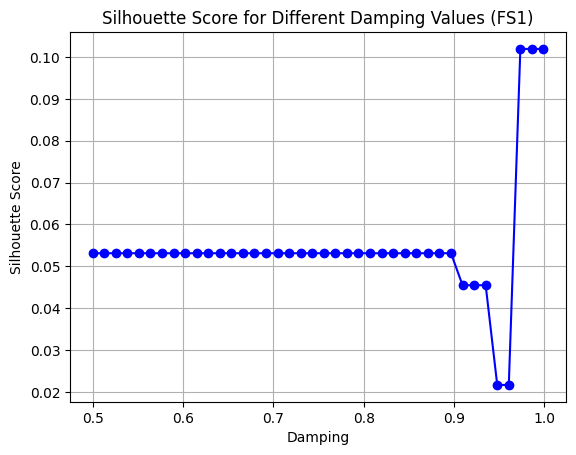

Best damping value (FS1): 0.9734102564102565
Silhouette Score: 0.10193384057623803


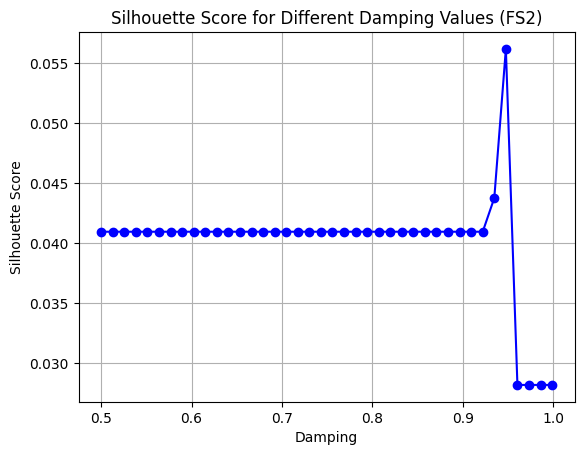

Best damping value (FS2): 0.9478205128205128
Silhouette Score: 0.056184111699643595


In [13]:
# Visualize Silhouette Score trend

# Plot Silhouette Scores for FS1
plt.plot(damping_values, silhouette_scores_fs1, marker='o', linestyle='-', color='b')
plt.xlabel('Damping')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different Damping Values (FS1)')
plt.grid(True)
plt.show()

print("Best damping value (FS1):", best_damping_silhouette_fs1)
print("Silhouette Score:", best_score_silhouette_fs1)


# Plot Silhouette Scores for FS2
plt.plot(damping_values, silhouette_scores_fs2, marker='o', linestyle='-', color='b')
plt.xlabel('Damping')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different Damping Values (FS2)')
plt.grid(True)
plt.show()

print("Best damping value (FS2):", best_damping_silhouette_fs2)
print("Silhouette Score:", best_score_silhouette_fs2)

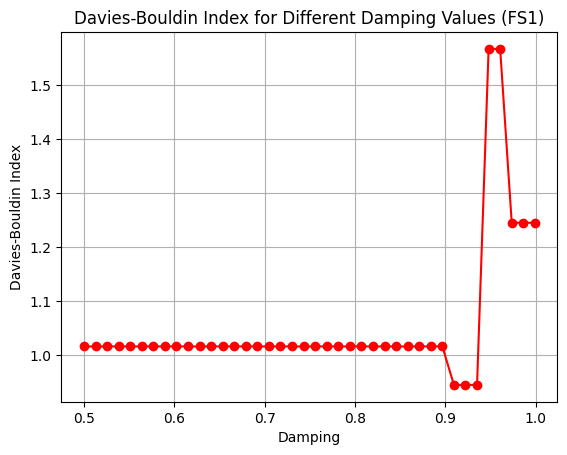

Best damping value (FS1): 0.9094358974358974
Davies-Bouldin Index: 0.9446307175899703


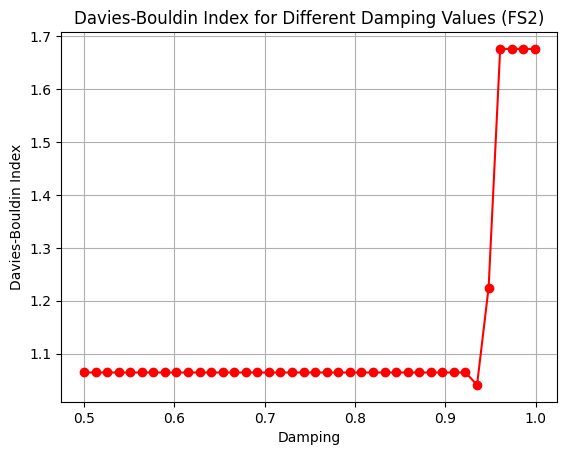

Best damping value (FS2): 0.935025641025641
Davies-Bouldin Index: 1.040633714308968


In [14]:
# Visualize Davies-Bouldin Index trend

# Plot Davies-Bouldin Index for FS1
plt.plot(damping_values, davies_bouldin_scores_fs1, marker='o', linestyle='-', color='r')
plt.xlabel('Damping')
plt.ylabel('Davies-Bouldin Index')
plt.title('Davies-Bouldin Index for Different Damping Values (FS1)')
plt.grid(True)
plt.show()

print("Best damping value (FS1):", best_damping_davies_bouldin_fs1)
print("Davies-Bouldin Index:", best_score_davies_bouldin_fs1)


# Plot Davies-Bouldin Index for FS2
plt.plot(damping_values, davies_bouldin_scores_fs2, marker='o', linestyle='-', color='r')
plt.xlabel('Damping')
plt.ylabel('Davies-Bouldin Index')
plt.title('Davies-Bouldin Index for Different Damping Values (FS2)')
plt.grid(True)
plt.show()

print("Best damping value (FS2):", best_damping_davies_bouldin_fs2)
print("Davies-Bouldin Index:", best_score_davies_bouldin_fs2)

In [15]:
# CLUSTERING

In [16]:
# Train Affinity Propagation model with best damping value

# Variables:
# - silhouette_best_affprog_fs1, silhouette_best_cluster_labels_fs1: AffinityPropagation model and cluster labels for fs1 using best damping for Silhouette Score.
# - silhouette_best_affprog_fs2, silhouette_best_cluster_labels_fs2: AffinityPropagation model and cluster labels for fs2 using best damping for Silhouette Score.
# - davies_best_affprog_fs1, davies_best_cluster_labels_fs1: AffinityPropagation model and cluster labels for fs1 using best damping for Davies-Bouldin Index.
# - davies_best_affprog_fs2, davies_best_cluster_labels_fs2: AffinityPropagation model and cluster labels for fs2 using best damping for Davies-Bouldin Index.


# Train Affinity Propagation model with best damping value (Silhouette Score)

silhouette_best_affprog_fs1 = AffinityPropagation(damping=best_damping_silhouette_fs1)
silhouette_best_cluster_labels_fs1 = silhouette_best_affprog_fs1.fit_predict(fs1)

silhouette_best_affprog_fs2 = AffinityPropagation(damping=best_damping_silhouette_fs2)
silhouette_best_cluster_labels_fs2 = silhouette_best_affprog_fs2.fit_predict(fs2)


# Train Affinity Propagation model with best damping value (Davies-Bouldin Index)

davies_best_affprog_fs1 = AffinityPropagation(damping=best_damping_davies_bouldin_fs1)
davies_best_cluster_labels_fs1 = davies_best_affprog_fs1.fit_predict(fs1)

davies_best_affprog_fs2 = AffinityPropagation(damping=best_damping_davies_bouldin_fs2)
davies_best_cluster_labels_fs2 = davies_best_affprog_fs2.fit_predict(fs2)

In [17]:
# VISUALIZATION

In [18]:
# Add cluster labels to dataset

# Variables:
# - silhouette_cluster_labels_fs1, silhouette_cluster_labels_fs2: Cluster labels obtained using the best damping value for Silhouette Score in Feature Sets 1 (fs1) and 2 (fs2).
# - silhouette_clustered_dataset_fs1, silhouette_clustered_dataset_fs2: Datasets with added cluster labels for fs1 and fs2 using best damping for Silhouette Score.
# - davies_cluster_labels_fs1, davies_cluster_labels_fs2: Cluster labels obtained using the best damping value for Davies-Bouldin Index in Feature Sets 1 (fs1) and 2 (fs2).
# - davies_clustered_dataset_fs1, davies_clustered_dataset_fs2: Datasets with added cluster labels for fs1 and fs2 using best damping for Davies-Bouldin Index.

silhouette_cluster_labels_fs1 = silhouette_best_cluster_labels_fs1
silhouette_clustered_dataset_fs1 = fs1.copy()
silhouette_clustered_dataset_fs1['Cluster Labels'] = silhouette_cluster_labels_fs1

silhouette_cluster_labels_fs2 = silhouette_best_cluster_labels_fs2
silhouette_clustered_dataset_fs2 = fs2.copy()
silhouette_clustered_dataset_fs2['Cluster Labels'] = silhouette_cluster_labels_fs2

davies_cluster_labels_fs1 = davies_best_cluster_labels_fs1
davies_clustered_dataset_fs1 = fs1.copy()
davies_clustered_dataset_fs1['Cluster Labels'] = davies_cluster_labels_fs1

davies_cluster_labels_fs2 = davies_best_cluster_labels_fs2
davies_clustered_dataset_fs2 = fs2.copy()
davies_clustered_dataset_fs2['Cluster Labels'] = davies_cluster_labels_fs2

In [25]:
# Number of clusters

davies_clustered_dataset_fs1['Cluster Labels'].value_counts()

4     31
2     16
9      5
0      1
1      1
3      1
5      1
6      1
7      1
8      1
10     1
11     1
12     1
13     1
Name: Cluster Labels, dtype: int64

In [20]:
# Add track file column back

silhouette_clustered_dataset_fs1['Track file'] = queen_dataset_full.iloc[:, 0]
silhouette_clustered_dataset_fs2['Track file'] = queen_dataset_full.iloc[:, 0]

davies_clustered_dataset_fs1['Track file'] = queen_dataset_full.iloc[:, 0]
davies_clustered_dataset_fs2['Track file'] = queen_dataset_full.iloc[:, 0]

In [21]:
# Convert dataframe to csv

# silhouette_clustered_dataset_fs1.to_csv('AffProg_fs1_silhouette.csv', index=False)
# silhouette_clustered_dataset_fs2.to_csv('AffProg_fs2_silhouette.csv', index=False)

# davies_clustered_dataset_fs1.to_csv('AffProg_fs1_davies.csv', index=False)
# davies_clustered_dataset_fs2.to_csv('AffProg_fs2_davies.csv', index=False)